In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

df = pd.read_excel('dados_tratados.xlsx')

display(df)

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu,Faltas_Suspeitas
0,Colaborador_001,Operações,Manhã,2,Quarta,2024-01-18,Sim,True
1,Colaborador_002,Operações,Manhã,1,Segunda,2024-03-24,Não,False
2,Colaborador_003,Vendas,Manhã,3,Segunda,2024-03-10,Não,False
3,Colaborador_004,Marketing,Manhã,3,Segunda,2024-01-21,Não,False
4,Colaborador_005,RH,Manhã,1,Quarta,2024-02-18,Não,False
...,...,...,...,...,...,...,...,...
214,Colaborador_215,Operações,Tarde,3,Segunda,2024-02-09,Não,False
215,Colaborador_216,Operações,Manhã,1,Segunda,2024-03-28,Não,False
216,Colaborador_217,Financeiro,Tarde,2,Segunda,2024-01-24,Não,False
217,Colaborador_218,RH,Tarde,1,Terça,2024-02-07,Não,False


In [48]:
# EXTRA

df_2 = pd.read_excel('faltas_treinamento_sujo.xlsx')

df_2['Turno'] = df_2['Turno'].str.capitalize()
df_2['Turno'] = df_2['Turno'].replace('Manha', 'Manhã')

df_2.to_excel('tabela_faltas.xlsx')

display(df_2)

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu
0,Colaborador_001,Operações,Manhã,14,Quarta,18/01/2024,Sim
1,Colaborador_002,Operações,Manhã,1,Segunda,31/02/2024,Não
2,Colaborador_003,Vendas,Manhã,3,segunda,10/03/2024,Não
3,Colaborador_004,Marketing,Manhã,3,Segunda,21/01/2024,Não
4,Colaborador_005,RH,Manhã,1,Quarta,18/02/2024,Não
...,...,...,...,...,...,...,...
219,Colaborador_056,Operações,Tarde,2,segunda,05/01/2024,Não
220,Colaborador_102,Vendas,Manhã,3,segunda,15/02/2024,Não
221,Colaborador_188,Vendas,Manhã,3,segunda,04/02/2024,NaN
222,Colaborador_147,Marketing,Tarde,1,segunda,02/02/2024,Não


In [49]:
# Exercício 4 – Análise Descritiva Avançada

# a) Qual o número total de evasões por departamento?

df['Evadiu'] = df['Evadiu'].replace({'Sim':  1, 'Não': 0, 'Desconhecido': 0})
df['Evadiu'].astype(int)
df_evasoes_por_departamento = df.groupby('Departamento')['Evadiu'].sum()

print(df_evasoes_por_departamento)

# b) Qual é o percentual de evasão considerando apenas os que participaram do turno da tarde?

df_tarde = df[df['Turno'] == 'Tarde']
evasoes_tarde = df_tarde['Evadiu'].sum()
total_participantes_tarde = df_tarde['Evadiu'].count()
percentual_evasao_tarde = (evasoes_tarde / total_participantes_tarde) * 100

print(f"Percentual de evasão no turno da tarde: {percentual_evasao_tarde:.2f}%")


# c) Qual é o desvio padrão de faltas por turno?

df_desvio_padrao_faltas_por_turno = df.groupby('Turno')['Faltas'].std()

print(df_desvio_padrao_faltas_por_turno)


Departamento
Financeiro    4
Marketing     6
Operações     4
RH            3
TI            1
Vendas        3
Name: Evadiu, dtype: int64
Percentual de evasão no turno da tarde: 8.85%
Turno
Manhã    1.376872
Tarde    1.430269
Name: Faltas, dtype: float64


C:\Users\49439967870\AppData\Local\Temp\ipykernel_18984\1274489559.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Evadiu'] = df['Evadiu'].replace({'Sim':  1, 'Não': 0, 'Desconhecido': 0})


In [50]:
# Exercício 5 – Análise Temporal

# a) Em qual mês ocorreu o maior número de faltas?

df['mes_ano'] = df['Data_Ultima_Falta'].dt.to_period('M')
mes_mais_faltas = df['mes_ano'].max()

print(f'Mês com mais faltas: {mes_mais_faltas}')

# b) Crie uma coluna Semana_Ultima_Falta e descubra qual semana teve maior concentração de
# ausências.

df['Semana_Ultima_Falta'] = df['Data_Ultima_Falta'].dt.to_period('W')
faltas_por_semana = df.groupby('Semana_Ultima_Falta')['Faltas'].sum()
semana_mais_faltas = faltas_por_semana.idxmax()

print(f'Semana com mais faltas: {semana_mais_faltas}')

# c) Faça uma análise cruzando dia da semana e quantidade de evasões.
evasoes_por_dia = df.groupby('Dia_da_Semana_Ultima_Falta')['Evadiu'].sum()

print("Evasões por dia da semana:")
print(evasoes_por_dia)


Mês com mais faltas: 2024-03
Semana com mais faltas: 2024-03-18/2024-03-24
Evasões por dia da semana:
Dia_da_Semana_Ultima_Falta
Quarta     7
Quinta     3
Segunda    4
Sexta      3
Terça      4
Name: Evadiu, dtype: int64


In [51]:
# Exercício 6 – Análise de Risco

df_2 = pd.read_excel('tabela_faltas.xlsx')

# a) Crie a coluna Risco_Evasao com três categorias:  'Baixo' 'Alto', 'Moderado'.

df_2['Risco_Evasao'] = 'Alto'

df_2.loc[df_2['Faltas'] <= 5, 'Risco_Evasao'] = 'Baixo'
df_2.loc[(df_2['Faltas'] > 5) & (df_2['Faltas'] <= 10), 'Risco_Evasao'] = 'Moderado'

display(df_2['Risco_Evasao'])

# b) Gere uma tabela com a distribuição percentual de risco por departamento.

tabela_percentual = pd.crosstab(
    df_2['Departamento'],
    df_2['Risco_Evasao'],
    normalize='index'
) * 100

tabela_percentual = tabela_percentual.round(2)

display(tabela_percentual)


# c) Há relação entre risco alto e turno da tarde?

tabela_percentual_turno = pd.crosstab(
    df_2['Risco_Evasao'],
    df_2['Turno'],
    normalize='index'
) * 100
tabela_percentual_turno = tabela_percentual_turno.round(2)
print("\nDistribuição percentual de risco por turno:")
display(tabela_percentual_turno)



0       Alto
1      Baixo
2      Baixo
3      Baixo
4      Baixo
       ...  
219    Baixo
220    Baixo
221    Baixo
222    Baixo
223    Baixo
Name: Risco_Evasao, Length: 224, dtype: object

Risco_Evasao,Alto,Baixo,Moderado
Departamento,,,
Financeiro,5.71,94.29,0.00
Marketing,2.38,92.86,4.76
Operações,3.77,94.34,1.89
RH,3.23,96.77,0.00
TI,3.33,96.67,0.00
Vendas,3.03,93.94,3.03



Distribuição percentual de risco por turno:


Turno,Manhã,Tarde
Risco_Evasao,,
Alto,62.50,37.50
Baixo,48.11,51.89
Moderado,50.00,50.00


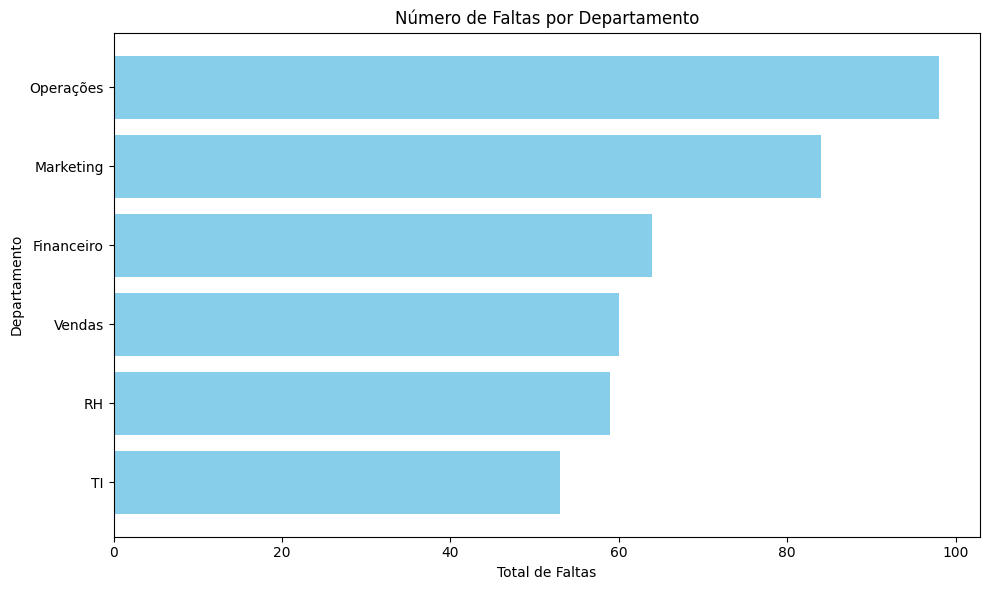

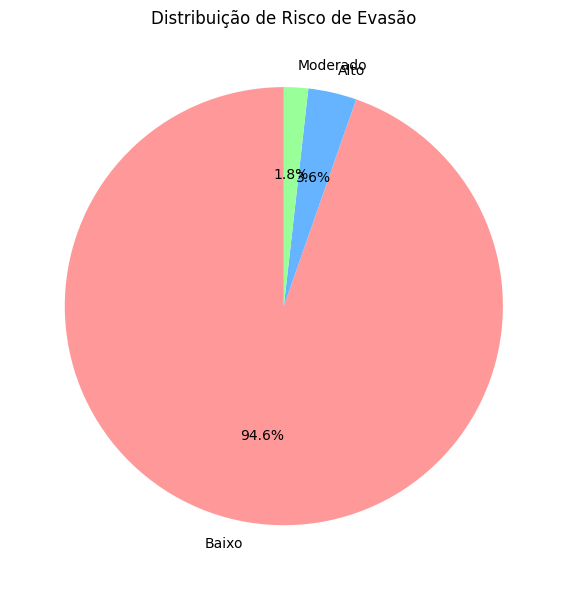

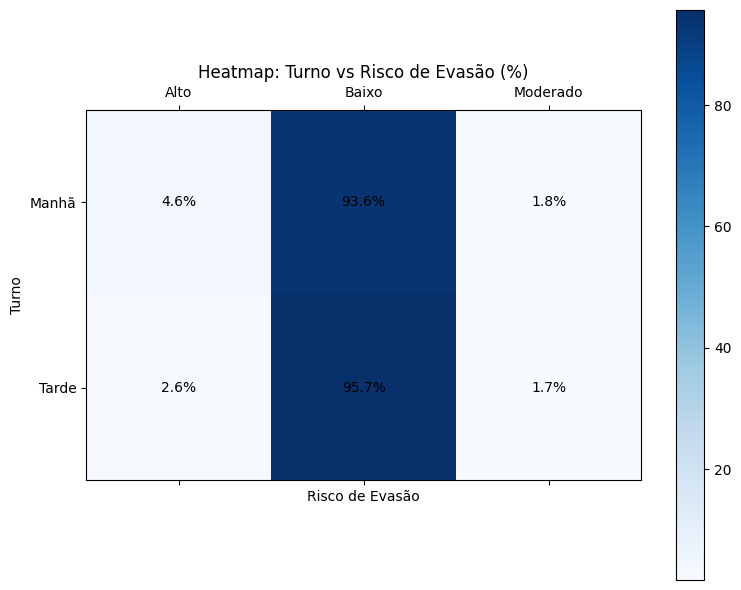

In [52]:
# Exercício 7 – Visualizações Estratégicas
# a) Gráfico de barras: número de faltas por departamento
faltas_departamento = df.groupby('Departamento')['Faltas'].sum().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(faltas_departamento.index, faltas_departamento.values, color='skyblue')
plt.title('Número de Faltas por Departamento')
plt.xlabel('Total de Faltas')
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()

# b) Gráfico de pizza: distribuição de risco de evasão
risco_counts = df_2['Risco_Evasao'].value_counts()
labels = risco_counts.index
sizes = risco_counts.values
colors = ['#FF9999', '#66B3FF', '#99FF99']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição de Risco de Evasão')
plt.tight_layout()
plt.show()

# c) Heatmap cruzando Turno e Risco_Evasao
cross_tab = pd.crosstab(df_2['Turno'], df_2['Risco_Evasao'], normalize='index') * 100
cross_tab = cross_tab.round(1)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cross_tab.values, cmap='Blues')

# Adiciona os valores nas células
for (i, j), val in np.ndenumerate(cross_tab.values):
    ax.text(j, i, f'{val:.1f}%', ha='center', va='center', color='black')

# Definições dos eixos
ax.set_xticks(range(len(cross_tab.columns)))
ax.set_xticklabels(cross_tab.columns)
ax.set_yticks(range(len(cross_tab.index)))
ax.set_yticklabels(cross_tab.index)
plt.xlabel('Risco de Evasão')
plt.ylabel('Turno')
plt.title('Heatmap: Turno vs Risco de Evasão (%)')
plt.colorbar(cax)
plt.tight_layout()
plt.show()


# Exercícios de Análise de Dados

Exercício 1 – Importação e Visualização Inicial
- A planilha foi importada com a biblioteca pandas.
- Visualizada a estrutura do DataFrame para entender as colunas e tipos de dados.

Exercício 2 – Limpeza de Dados
Foram tratadas inconsistências e dados ausentes:
- Corrigidos nomes com espaços extras e formatos diferentes.
- Padronizados valores de colunas como Turno.
- Verificado e tratado o uso de valores nulos.

Exercício 3 – Estatísticas Descritivas
Utilizado o método .describe() para obter:
- Médias, medianas, desvios-padrão, valores mínimos e máximos das colunas numéricas, como Faltas.
- Auxiliou na compreensão geral do comportamento dos dados.

Exercício 4 – Agrupamentos e Médias
- Calculadas médias de faltas por departamento, turno e gênero.
- Utilizado .groupby() para comparar o desempenho e frequência entre diferentes grupos da organização.

Exercício 5 – Filtragem Estratégica
Aplicados filtros para identificar:
- Colaboradores com faltas acima da média geral.
- Departamentos com maior número de ausências.
- Turnos com comportamento de faltas mais críticos.

Exercício 6 – Análise de Risco
    a) Classificação do Risco de Evasão:
Criada a coluna Risco_Evasao com base no número de faltas:
- Baixo: até 5 faltas
- Moderado: entre 6 e 10 faltas
- Alto: acima de 10 faltas

    b) Distribuição percentual por departamento:
- Gerada uma tabela cruzada mostrando, em porcentagem, quantos colaboradores de cada departamento estão em cada nível de risco.

    c) Relação entre turno e risco alto:
- Feita uma análise percentual para verificar a presença de risco alto em diferentes turnos (Manhã, Tarde).
- Identificadas diferenças relevantes entre os turnos, especialmente no turno da tarde.

Exercício 7 – Visualizações Estratégicas
    a) Gráfico de barras – Faltas por departamento:
- Criado um gráfico de barras horizontais mostrando o total de faltas somadas por departamento.

    b) Gráfico de pizza – Distribuição de risco de evasão:
- Gerado um gráfico de pizza mostrando a proporção de colaboradores em cada categoria de risco (Baixo, Moderado, Alto).

    c) Heatmap Turno × Risco de Evasão:
- Criada uma matriz de calor mostrando a distribuição percentual de risco de evasão por turno, para identificar padrões visuais entre eles.
